<a href="https://colab.research.google.com/github/niranjana2222/Discovering-Potential-Skin-Cancer-Drugs-/blob/main/models2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Get data
cancer = pd.read_csv('/content/descriptors2.csv')
#cancer['label'] = np.zeros((2525, 1)).tolist()
cancer['label'] = 0
print("Size", cancer.shape)

drugs = pd.read_csv('/content/zinc.csv')
#drugs['label'] = np.ones((893, 1)).tolist()
drugs['label'] = 1
print("Size", drugs.shape)

data = pd.concat([cancer, drugs])

#Clean data
data = data.dropna()
#del data['smiles']
#data = data.drop('smiles',axis=1)
print("Size", data.shape)


Size (3288, 1876)
Size (3289, 1876)
Size (4798, 1876)


             nAcid        ALogP       ALogp2          AMR         apol  \
count  4798.000000  4798.000000  4798.000000  4798.000000  4798.000000   
mean      0.104627    -0.465144     2.491074    57.374171    44.291172   
std       0.429639     1.508373     5.308648    38.002494    15.125642   
min       0.000000   -12.994800     0.000000     0.000000     8.231172   
25%       0.000000    -1.413675     0.225744    28.266200    34.152602   
50%       0.000000    -0.459450     1.021818    43.975100    42.959998   
75%       0.000000     0.490175     3.061975    85.167200    52.172213   
max       6.000000     7.416100   168.864827   322.969800   158.877720   

        naAromAtom    nAromBond        nAtom   nHeavyAtom           nH  ...  \
count  4798.000000  4798.000000  4798.000000  4798.000000  4798.000000  ...   
mean      9.083785     9.703835    38.023551    20.523760    17.499792  ...   
std       5.479172     5.768051    13.714747     6.833845     7.962670  ...   
min       0.00000

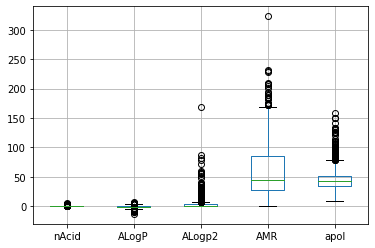

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

###Analyze Data####
print(data.describe())
print(data.head())
print("Size", data.shape)

corr = data.corr().abs()
corr2 = corr.unstack()
print(corr2.sort_values(kind="quicksort", ascending=False))
print("Corr\n", corr2.value_counts())

print((data.max()-data.min()).sort_values(kind="quicksort", ascending=False))
print("Range\n", (data.max()-data.min()).value_counts())

print(data.isnull().sum().sort_values(kind="quicksort", ascending=False))
print("Null\n", data.isnull().sum().value_counts().sort_values(kind="quicksort"))

corr3 = corr2.value_counts().rename_axis('unique_values').to_frame('counts')
print(corr3)

boxplot_nat = data.boxplot(column=['nAcid', 'ALogP', 'ALogp2' , 'AMR' , 'apol'])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
labels = data['label']
print(labels)
del data['label']
print(data)
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42)


0       0
1       0
2       0
3       0
4       0
       ..
3262    1
3263    1
3264    1
3265    1
3266    1
Name: label, Length: 4798, dtype: int64
      nAcid   ALogP     ALogp2       AMR       apol  naAromAtom  nAromBond  \
0         0  0.3167   0.100299   93.1538  59.369790           0          0   
1         0 -0.1076   0.011578   12.5551   8.322758           0          0   
2         0 -6.1574  37.913575   71.4075  70.194478           0          0   
3         0  0.1474   0.021727  111.3365  59.298239          12         12   
4         0  2.0343   4.138376  111.6621  52.737102          17         17   
...     ...     ...        ...       ...        ...         ...        ...   
3262      0  0.0156   0.000243   36.0792  49.854688          12         18   
3263      0  2.9489   8.696011   47.2341  51.488688          15         16   
3264      0  1.0695   1.143830   41.6922  52.146274          12         18   
3265      0  0.9468   0.896430   40.0962  39.496723          11       

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LR 0.8216666666666667


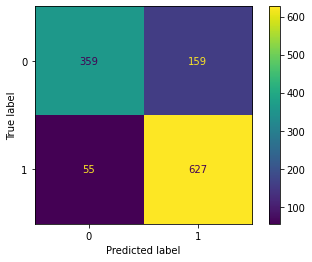

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       518
           1       0.80      0.92      0.85       682

    accuracy                           0.82      1200
   macro avg       0.83      0.81      0.81      1200
weighted avg       0.83      0.82      0.82      1200



In [14]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report

lr = LogisticRegression(solver='lbfgs', max_iter=1000000)
lr.fit(X_train, y_train)
#mlp.predict_proba(X_test)
predictions = lr.predict(X_test)
print("LR", accuracy_score(y_test, predictions))

plot_confusion_matrix(lr, X_test, y_test)  
plt.show()

print(classification_report(y_test,predictions))

SVM 0.5775


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


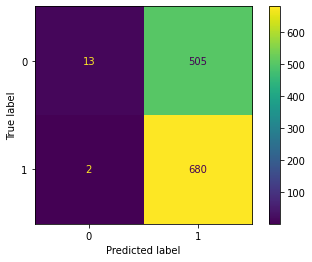

              precision    recall  f1-score   support

           0       0.87      0.03      0.05       518
           1       0.57      1.00      0.73       682

    accuracy                           0.58      1200
   macro avg       0.72      0.51      0.39      1200
weighted avg       0.70      0.58      0.44      1200



In [16]:
from sklearn.svm import SVC 

svc = SVC()
svc.fit(X_train, y_train)
#mlp.predict_proba(X_test)
predictions = svc.predict(X_test)
print("SVM", accuracy_score(y_test, predictions))

plot_confusion_matrix(svc, X_test, y_test)  
plt.show()

print(classification_report(y_test,predictions))

MLP 0.825


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


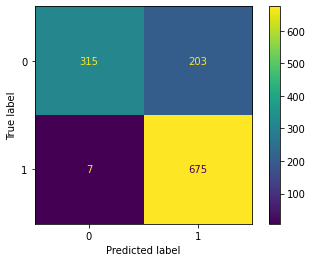

              precision    recall  f1-score   support

           0       0.98      0.61      0.75       518
           1       0.77      0.99      0.87       682

    accuracy                           0.82      1200
   macro avg       0.87      0.80      0.81      1200
weighted avg       0.86      0.82      0.82      1200



In [15]:
#MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)
#mlp.predict_proba(X_test)
predictions = mlp.predict(X_test)
print("MLP", accuracy_score(y_test, predictions))

plot_confusion_matrix(mlp, X_test, y_test)  
plt.show()

print(classification_report(y_test,predictions))

NB 0.7425


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


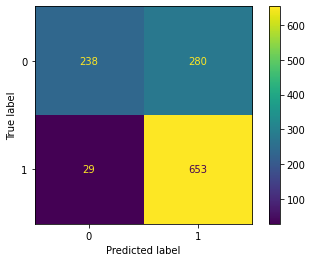

              precision    recall  f1-score   support

           0       0.89      0.46      0.61       518
           1       0.70      0.96      0.81       682

    accuracy                           0.74      1200
   macro avg       0.80      0.71      0.71      1200
weighted avg       0.78      0.74      0.72      1200



In [5]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
print("NB", accuracy_score(y_test, predictions))

plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()

print(classification_report(y_test,predictions))

#print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

In [6]:
#train decision tree classifier
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

#train extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_train,y_train)

#train random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)

RandomForestClassifier()

Decision Tree 0.9625


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


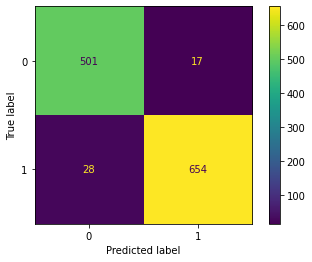

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       518
           1       0.97      0.96      0.97       682

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



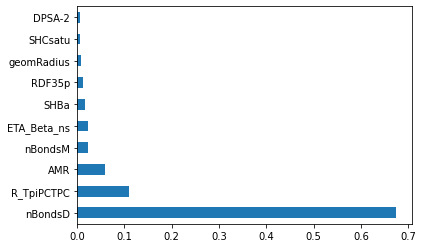

Feature: 0, Score: 0.67455


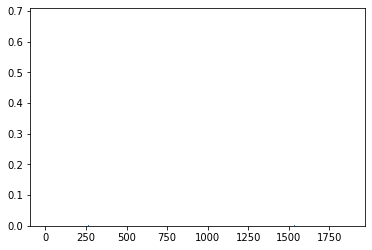

Feature: 1, Score: 0.11055


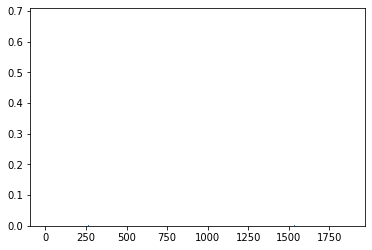

Feature: 2, Score: 0.05854


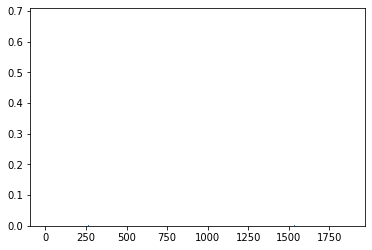

Feature: 3, Score: 0.02365


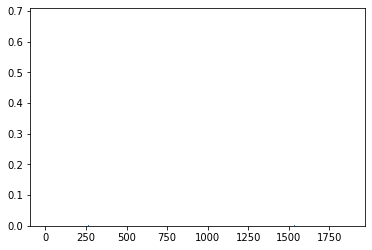

Feature: 4, Score: 0.02283


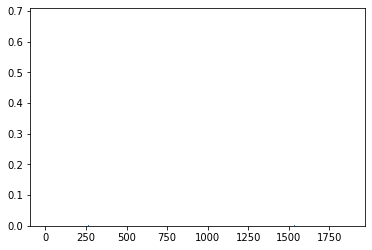

Feature: 5, Score: 0.01612


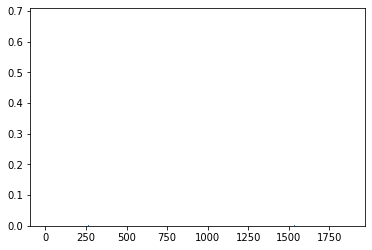

Feature: 6, Score: 0.01190


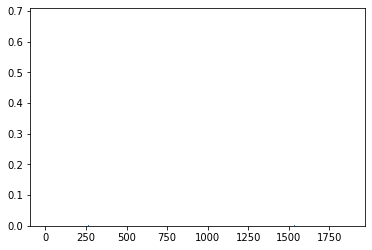

Feature: 7, Score: 0.00794


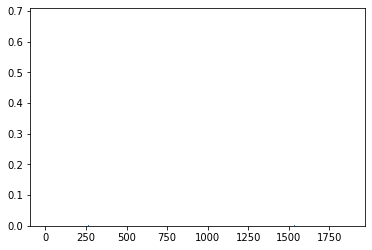

Feature: 8, Score: 0.00634


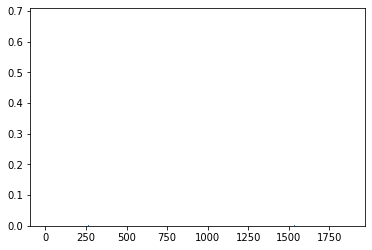

Feature: 9, Score: 0.00631


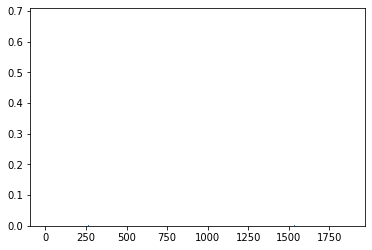

Extra Trees 0.9083333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


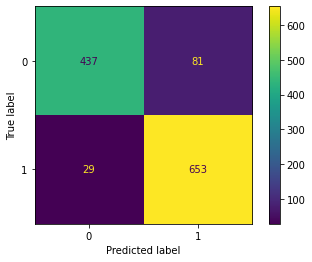

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       518
           1       0.89      0.96      0.92       682

    accuracy                           0.91      1200
   macro avg       0.91      0.90      0.91      1200
weighted avg       0.91      0.91      0.91      1200



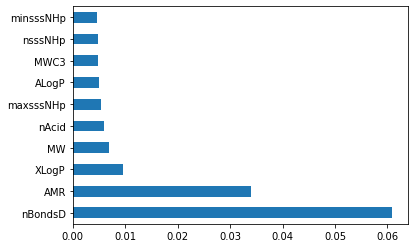

Feature: 0, Score: 0.06081


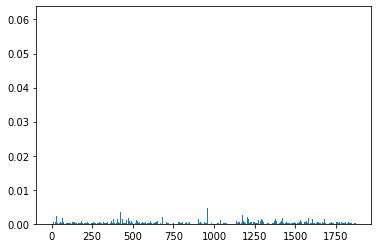

Feature: 1, Score: 0.03399


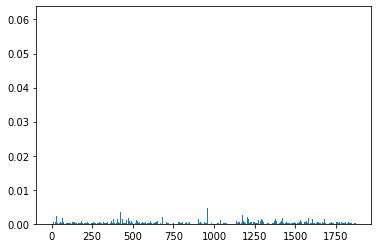

Feature: 2, Score: 0.00960


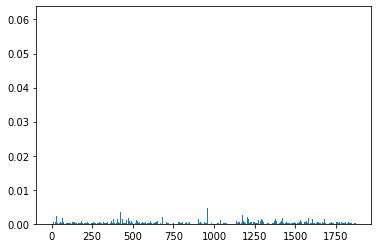

Feature: 3, Score: 0.00687


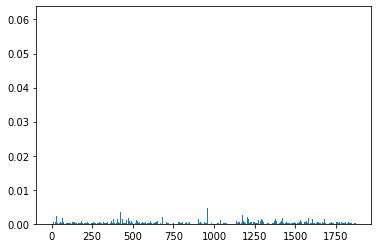

Feature: 4, Score: 0.00595


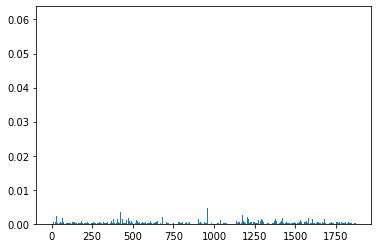

Feature: 5, Score: 0.00536


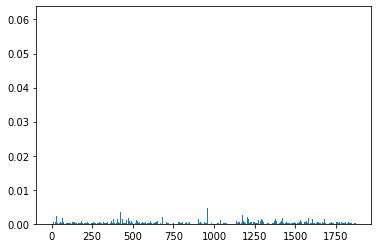

Feature: 6, Score: 0.00497


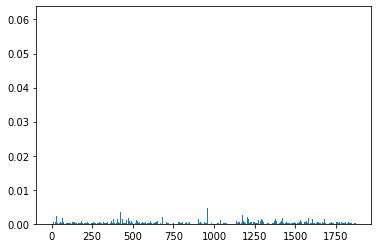

Feature: 7, Score: 0.00489


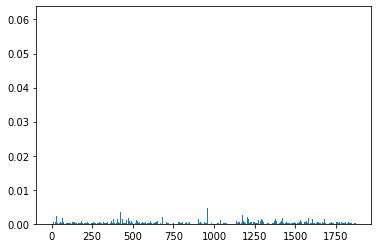

Feature: 8, Score: 0.00471


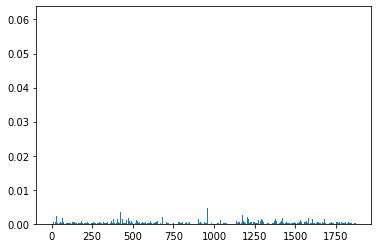

Feature: 9, Score: 0.00453


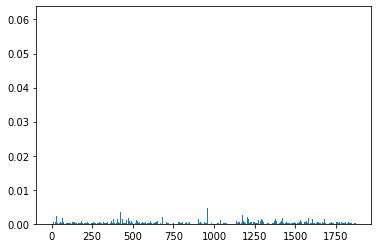

Random Forest 0.9608333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


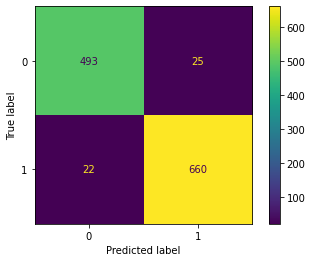

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       518
           1       0.96      0.97      0.97       682

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



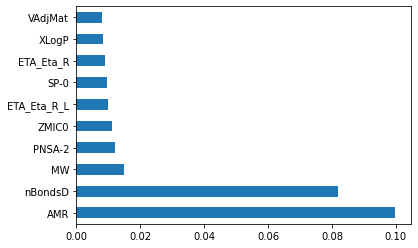

Feature: 0, Score: 0.09973


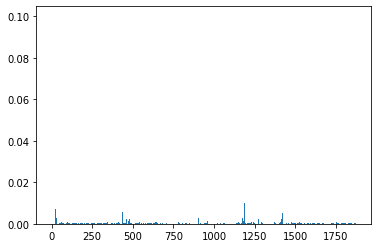

Feature: 1, Score: 0.08183


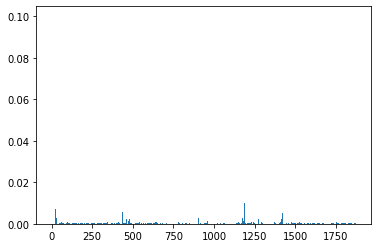

Feature: 2, Score: 0.01510


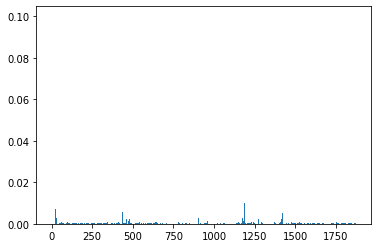

Feature: 3, Score: 0.01199


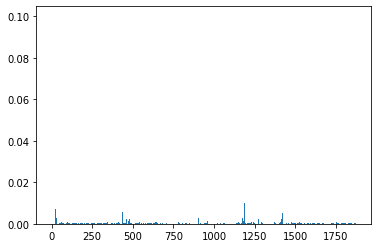

Feature: 4, Score: 0.01126


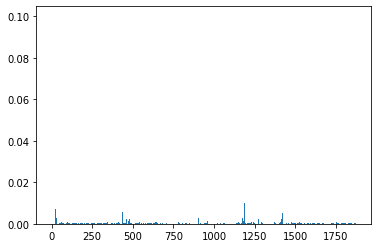

Feature: 5, Score: 0.00998


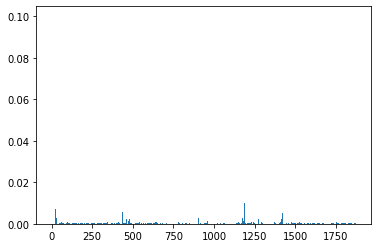

Feature: 6, Score: 0.00957


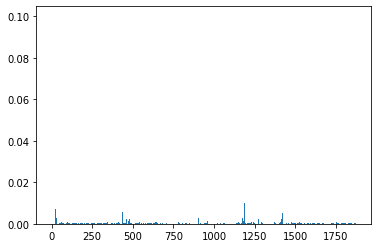

Feature: 7, Score: 0.00894


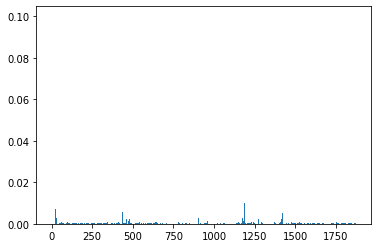

Feature: 8, Score: 0.00842


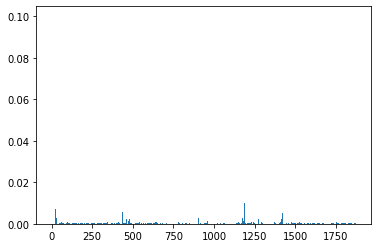

Feature: 9, Score: 0.00821


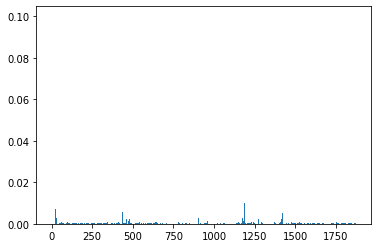

In [7]:
#evaluate tree models 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def evaluate(tree, name):
  y_pred = tree.predict(X_test)
  print(name, accuracy_score(y_pred, y_test))

  plot_confusion_matrix(tree, X_test, y_test)  
  plt.show()
  
  print(classification_report(y_test,y_pred))

  feat_importances = pd.Series(tree.feature_importances_, index=data.columns)
  feat_importances.nlargest(10).plot(kind='barh')
  plt.show()

  for i,v in enumerate(feat_importances.nlargest(10)):
    print('Feature: %0d, Score: %.5f' % (i,v))
    plt.bar([x for x in range(len(feat_importances))], feat_importances)
    plt.show()

evaluate(decision_tree, "Decision Tree")
evaluate(extra_trees, "Extra Trees")
evaluate(random_forest, "Random Forest")

In [8]:
#finetuning best model

In [9]:
#make predictions 
coconut = pd.read_csv('/content/coconut.csv')
predictions = model.predict(coconut)
prob = model.predict_proba(coconut)

print(predictions.value_count())

results = pd.concat([coconut[0], predictions, prob])
print(results)
print(results.describe())

print(results.value_count())

for row in results:
  if row[1] == 0:
    print(row)
    


FileNotFoundError: ignored